<a href="https://colab.research.google.com/github/dnjswlcks67/pdm12/blob/main/notebook/chap03_ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---



# chap03 
- ML introduction 

# iris: knn 

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris) #타겟의 정답이 0 1 2 로 정해져 있음 = 지도 학습 (0=setosa 1=versicolor 2=verginica)
iris.data.shape #150행 4열 == 150개의 샘플에 4가지로 분류 
iris.target.shape #(150,) = 0 50 1 50 2 50 총 150개의 타겟이 들어있음 
print(iris.target_names) #타겟의 이름 

from sklearn.model_selection import train_test_split

X = iris.data   #2차원 (150,4)
y = iris.target #1차원 벡터 (150, )

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape) #120,4
print(X_test.shape) #30,4

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train) #학습

y_pred = knn.predict(X_test) #예측 

from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred) #30개의 테스트 샘플을 매게 변수로 넣어줌 
print(scores) # 96.7%

#######################
#  Test on new data
#######################
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 전혀 보지 못한 새로운 데이터를 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# mnist: digits
- knn 

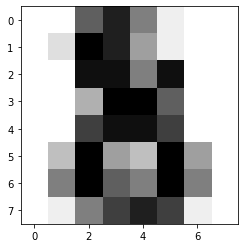

0.9805555555555555
[2]


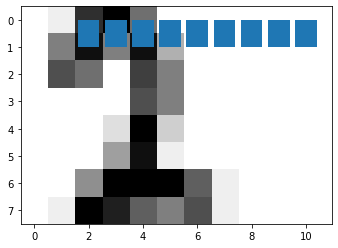

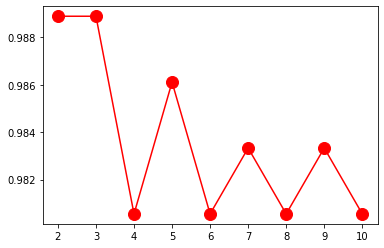

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits() #저 행상도 데이터를 담는다 
str(digits) #문자열 확인 = data..target .. target_name .. images 
# 2차원 이미지는 images에 target정보는 target 에 있을 것 == 지도학습 
digits.data.shape #(1797,64)
digits.images.shape #(1797,8,8) ->데이터는 1797개 , 8x8 2차원 이미지로 이루어져 있다. 
digits.target.shape #(1787,) = target개수 

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
#digits.target[-1] 을 하면 마지막 숫자를 확인할 수 있다. 
digits.images.shape

n_samples = len(digits.images)
digits.images.shape
# Flattening (평탄화) : (8, 8) => (64,)
data = digits.images.reshape((n_samples, -1))
data.shape

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=(4)) 
#random_state 값을 4로 할 경우 결과가 모두 같음 

knn.fit(X_train, y_train)
X_train.shape # 1437개를 test 데이터로 

y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred) #정확도 측정 
print(scores)

plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest') #10번째 test 데이터 
y_pred = knn.predict([X_test[10]])
print(y_pred)

#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11): #test 데이터 와 train 데이터를 랜덤하게 2~11개를 뽑고 정확도를 계산하여 평균을 낸다. 
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train) #훈련 
    y_pred = knn.predict(X_test) #예측
    score = metrics.accuracy_score(y_test, y_pred) #정확도 계산 
    scores.append(score)

scores

# Plot scores w.r.t. n_neighbors
plt.bar(range(2,11), scores)
# plt.ylim((0.95,1))
plt.show()

plt.plot(range(2,11), scores,'ro-', ms=12)
# plt.ylim((0.95,1))
plt.show()

# 혼동행렬 
- mnist dataset 
- knn 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


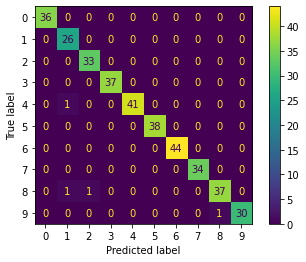

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      1.00      0.96        26
           2       0.97      1.00      0.99        33
           3       1.00      1.00      1.00        37
           4       1.00      0.98      0.99        42
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        34
           8       0.97      0.95      0.96        39
           9       1.00      0.97      0.98        31

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
# str(digits)
# digits.data.shape
# digits.images.shape
# digits.target.shape
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2) # 마찬가지로 random_state=4) 할 경우 결과를 재현 

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

disp = metrics.plot_confusion_matrix(knn, X_test, y_test) 
# knn 모델에 대하여 xtest 데이터 와 ytest 타겟을 넣어 혼동행렬을 그린다. 
# 0~9까지 10 가지 데이터 이므로 10x10  == 정확히 맞춘 것과 잘못 맞춘 것을 한번에 보여주는 것 = confusion matrix 
plt.show()

print(f"{metrics.classification_report(y_test, y_pred)}\n") 

